## 0. Import Libraries

In [1]:
import xarray as xr
import numpy as np

## 1. Open Data

In [2]:
# change if needed
time_frame = '198501_200512'
season = 'JJA' # DJF or JJA
data_type = 'era5land' # or era5

path_general = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/data/bias_correction'

### 1.1 Vector Data

In [3]:
# turkey vector data
turkey_bool = xr.open_dataset(fr"{path_general}/data/TOT_PREC/cosmo/BC/vectorized_turkey_mask_from_era5land.nc")

### 1.2 ERA5 Data

In [4]:
dt_era5 = xr.open_dataset(fr"{path_general}/{data_type}/{data_type}_TOT_PREC_{season}_1hr_regrid_1985_2005.nc")

## 2. Yearly Aggragate and Save

### 2.1 Sum

In [5]:
dt_era5_sum = dt_era5.groupby('time.year').sum()*1e3
dt_era5_sum = dt_era5_sum['tp'].where(turkey_bool==1).rename({'Tw':'TOT_PREC'})

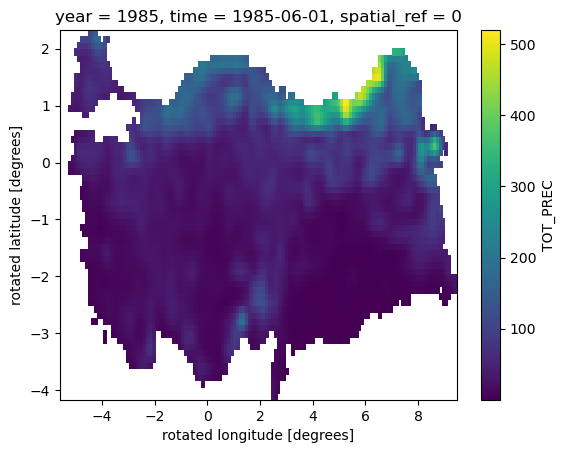

In [6]:
dt_era5_sum['TOT_PREC'][0].plot()

In [7]:
dt_era5_sum.to_netcdf(fr"{path_general}/{data_type}/{data_type}_TOT_PREC_{season}_1hr_regrid_aggregated_sum_{time_frame}.nc")

### 2.2 Max

In [8]:
dt_era5_max = dt_era5.groupby('time.year').max()*1e3
dt_era5_max = dt_era5_max['tp'].where(turkey_bool==1).rename({'Tw':'TOT_PREC'})

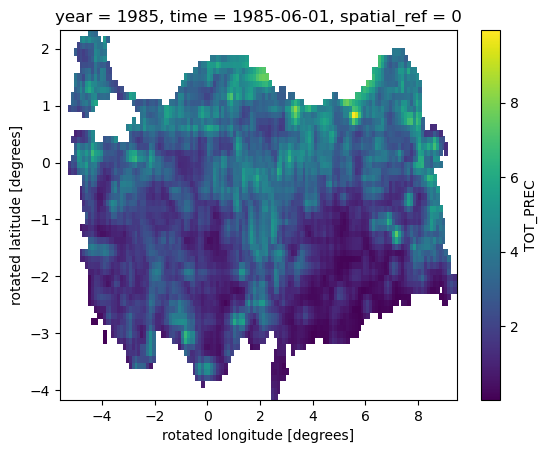

In [9]:
dt_era5_max['TOT_PREC'][0].plot()

In [10]:
dt_era5_max.to_netcdf(fr"{path_general}/{data_type}/{data_type}_TOT_PREC_{season}_1hr_regrid_aggregated_max_{time_frame}.nc")